In [1]:
!pip install pandas
!pip install requests
!pip install matplotlib
!pip install numpy
!pip install scipy

In [98]:
import pandas as pd
import requests

headers = {
    'x-api-key' : "SwW0Mt7bUi12i310pjeAaayb2KQ99GP41EPANKO0",
}
list_url='https://83i8cudoh7.execute-api.ap-east-1.amazonaws.com/dev/cryptos'

data = requests.get(list_url, headers=headers).json() #requesting list of crytpo info
data = pd.json_normalize(data,'data')

api_url = "https://83i8cudoh7.execute-api.ap-east-1.amazonaws.com/dev/crypto/"
prod_url = []
for i in data['product_id']:
    prod_url.append(f'{api_url}{i}')
eth = requests.get(prod_url[0],headers=headers).json()      #retrieving crypto info from api
btc = requests.get(prod_url[1],headers=headers).json()
usdc = requests.get(prod_url[2],headers=headers).json()
#get crypto daily price and return data from last 30 days
btc_d = pd.DataFrame(btc['data']['dod']).T
eth_d = pd.DataFrame(eth['data']['dod']).T
usdc_d = pd.DataFrame(usdc['data']['dod']).T
#get crypto monthly price and return data from 2019
btc_m = pd.DataFrame(btc['data']['mom']).T
eth_m = pd.DataFrame(eth['data']['mom']).T
usdc_m = pd.DataFrame(usdc['data']['mom']).T

In [99]:
#reading the old history price data from csv then merge with new data and update the csv
import pandas as pd
btc_hist = pd.read_csv('btc_daily.csv')
btc_d_p = btc_d.reset_index()
new_btc_d = pd.concat([btc_hist,btc_d_p])
new_btc_d.drop_duplicates(subset=['converted_date'],keep='last',inplace=True)
new_btc_d.drop('index', axis=1, inplace=True)
new_btc_d.to_csv('btc_daily.csv', index = False)

eth_hist = pd.read_csv('eth_daily.csv')
eth_d_p = eth_d.reset_index()
new_eth_d = pd.concat([eth_hist,eth_d_p])
new_eth_d.drop_duplicates(subset=['converted_date'],keep='last',inplace=True)
new_eth_d.drop('index', axis=1, inplace=True)
new_eth_d.to_csv('eth_daily.csv', index = False)

usdc_hist = pd.read_csv('usdc_daily.csv')
usdc_d_p = usdc_d.reset_index()
new_usdc_d = pd.concat([usdc_hist,usdc_d_p])
new_usdc_d.drop_duplicates(subset=['converted_date'],keep='last',inplace=True)
new_usdc_d.drop('index', axis=1, inplace=True)
new_usdc_d.to_csv('usdc_daily.csv', index = False)

In [100]:
import numpy as np
btc_month_data = pd.DataFrame(data=btc_m,index=btc_m.index)
btc_month_data = btc_month_data.rename(columns={'amount':'BTC_close','converted_date':'date','mom':'BTC_return'})
eth_month_data = pd.DataFrame(data=eth_m,index=eth_m.index)
eth_month_data = eth_month_data.rename(columns={'amount':'ETH_close','converted_date':'date','mom':'ETH_return'})
btc_eth_month = pd.merge(btc_month_data, eth_month_data, on='date')
usdc_month_data = pd.DataFrame(data=usdc_m,index=usdc_m.index)
usdc_month_data = usdc_month_data.rename(columns={'amount':'USDC_close','converted_date':'date','mom':'USDC_return'})
month_data = pd.merge(btc_eth_month, usdc_month_data, on='date')
month_data['date'] = pd.to_datetime(month_data['date'])
month_data.set_index([month_data['date']], inplace = True)
month_data = month_data[['date','BTC_close','BTC_return','ETH_close','ETH_return','USDC_close','USDC_return']]
month_data.replace(0, np.nan, inplace=True)

In [101]:
import numpy as np
btc_daily_data = pd.DataFrame(data=new_btc_d)
btc_daily_data = btc_daily_data.rename(columns={'amount':'BTC_close','converted_date':'date'})
btc_daily_data['BTC_log_ret'] = np.log((btc_daily_data['dod']+1).astype('float'))
btc_daily_data.drop(['dod'],axis=1)
eth_daily_data = pd.DataFrame(data=new_eth_d)
eth_daily_data = eth_daily_data.rename(columns={'amount':'ETH_close','converted_date':'date'})
eth_daily_data['ETH_log_ret'] = np.log((eth_daily_data['dod']+1).astype('float'))
eth_daily_data.drop(['dod'],axis=1)
usdc_daily_data = pd.DataFrame(data=new_usdc_d)
usdc_daily_data = usdc_daily_data.rename(columns={'amount':'USDC_close','converted_date':'date','dod':'USDC_ret'})
btc_eth_daily = pd.merge(btc_daily_data, eth_daily_data, on='date')
daily_data = pd.merge(btc_eth_daily, usdc_daily_data, on='date')
daily_data.set_index(daily_data['date'],inplace=True)
daily_data = daily_data[['BTC_close','BTC_log_ret','ETH_close','ETH_log_ret','USDC_close','USDC_ret']]
daily_data.replace(0, np.nan, inplace=True)
daily_data

,BTC_close,BTC_log_ret,ETH_close,ETH_log_ret,USDC_close,USDC_ret
date,,,,,,
2021-06-05,35513.199219,-0.036381,2627.729980,-0.023239,0.9998,0.0004
2021-06-06,35796.308594,0.007940,2711.919922,0.031537,0.9999,0.0001
2021-06-07,33552.789062,-0.064725,2592.050049,-0.045208,0.9999,NaN
2021-06-08,33380.808594,-0.005139,2507.229980,-0.033271,0.9993,-0.0006
2021-06-09,37388.050781,0.113370,2610.179932,0.040241,0.9993,NaN
2021-06-10,36675.718750,-0.019236,2471.090088,-0.054760,0.9996,0.0003
2021-06-11,37331.980469,0.017735,2354.010010,-0.048539,1.0002,0.0006
2021-06-12,35546.109375,-0.049020,2370.739990,0.007082,1.0000,-0.0002
2021-06-13,39020.570312,0.093258,2509.330078,0.056814,0.9999,-0.0001


In [102]:
#getting the history price of cryptos for last 30 days
hist_price_list = pd.DataFrame(daily_data[['BTC_close',"ETH_close","USDC_close"]])
#getting the returns of cryptos and normalize it to log return for last 30 days
log_return2 = pd.DataFrame(data = daily_data[['BTC_log_ret','ETH_log_ret']])
#find out optimal weights using last 6 months results
last_6_months = month_data.iloc[-8:-2]
last_6_months = last_6_months[['BTC_return','ETH_return']]
last_6_months['BTC_return'] = np.log((last_6_months['BTC_return']+1).astype('float'))
last_6_months['ETH_return'] = np.log((last_6_months['ETH_return']+1).astype('float'))

#get the average daily return of last 6 months for initializing the daily return
last_month = last_6_months
last_month = last_month.div(120)
init_return = pd.DataFrame(columns=last_month.columns)
init_return = init_return.append(last_month[-1:]) 
init_return = init_return.rename(columns={'BTC_return':'BTC_log_ret','ETH_return':'ETH_log_ret'})
init_return

,BTC_log_ret,ETH_log_ret
2021-05-01,-0.003645,-0.000202


In [103]:
#the function of efficient frontier to calculate optimal weight
from scipy.optimize import minimize
def Efficient_frontier(data,period):
    meanRet = data.mean()
    sigma  = data.cov()
    def get_metrics(w) ->np.array:
        w = np.array(w)
        R = np.sum(meanRet*w)*period
        V = np.sqrt(np.dot(w.T,np.dot(sigma*period,w)))
        SR = R/V
        return np.array([R,V,SR], dtype="object")
    def neg_sharpe(w) ->np.array:
        return get_metrics(w)[2] * -1

    def volatility(w) ->np.array:
        return get_metrics(w)[1]
#check if the sum of two cryptos equals to 1 minus the reserved weight for USD Coin
    def check_sum(w) ->float:
        return np.sum(w) - (1 - portfolio_reserve)

    guess = [0.5,0.5]
    bounds = tuple((0.0,1.0) for i in range(2))
    constraints = ({'type':'eq', 'fun': check_sum})
    optimized_volatility = minimize(volatility,guess,method='SLSQP',bounds=bounds,constraints=constraints)
    return optimized_volatility.x


In [104]:
#functions of Buying, Selling and creating log signal
def Buy(symbol,price,buy_amount):
    buy_amount = round(buy_amount,7)
    used_balance = price*buy_amount
    return buy_amount

def Sell(symbol,price,sell_amount):
    sell_amount = round(sell_amount,7)
    used_balance = price*sell_amount
    return sell_amount

def log(signal,symbol,amount,price,date):
    data = [date,signal,symbol,amount,price]
    if signal =='Buy':
        print(f"At {date} : Buy {amount} {symbol} @${price}")
    elif signal =='Sell':
        print(f"At {date} : Sell {amount} {symbol} @${price}")
    log_data.append(data)

In [105]:
def new_value(today_price,portfolio,t_weight):
    y = 0
    new_value = 0
    for i in range(len(today_price)):
        y += 2
        amount = float(portfolio[y])
        new_value = new_value + today_price[i]*amount
    return new_value
def target_amount(today_price,t_weight,new_value):
    new_amount = new_value*t_weight/today_price
    return new_amount

In [130]:
#the main function for determining whether to buy or sell and the respective amount
def buy_or_sell(trade_on,weights,t_price,date):
    symbol = ["Bitcoin","Ethereum","USD Coin"]
    bal_weights = weights
    bal_weights.append(portfolio_reserve)
    collect_data = []     #get that data on that day(date, price of cryptos, amount for holding cryptos)
    old_amount = []       #get previous amount holding
    collect_data.append(date)
    global save_portfolio
    yesterday_portfolio = save_portfolio.iloc[-1]
    new_val = new_value(t_price,yesterday_portfolio,weights)  #get the current value of portfolio
    y = 0
    weight_log(symbol, bal_weights)
    for i in range(len(symbol)):     #looping each cryptos in for considering buy sell option
        y += 2
        old_amount = float(yesterday_portfolio[y])
        t_amount = target_amount(t_price[i],weights[i],new_val)
        check_first_day = len(save_portfolio)       #check is it first day of backtesting, if yes than use the initial optimal weight
        if check_first_day == 1:
            in_t_amount = target_amount(t_price[i],weights[i],init_balance)
            gain_amount=Buy(symbol[i],t_price[i],in_t_amount)
            log('Buy',symbol[i],gain_amount,t_price[i],date)
            collect_data.append(t_price[i])
            collect_data.append(in_t_amount)
        else:
            if trade_on:              #to check that day whether the day able to trade
                diff_amount = t_amount - old_amount #calculate amount for buy or sell
                if diff_amount > 0.0:      
                    gain_amount = Buy(symbol[i],t_price[i],diff_amount)
                    log('Buy',symbol[i],gain_amount,t_price[i],date)  #printing the buy info
                    collect_data.append(t_price[i])
                    collect_data.append(t_amount)
                elif diff_amount < 0.0:
                    diff_amount = abs(diff_amount)
                    lose_amount = Buy(symbol[i],t_price[i],diff_amount)
                    log('Sell',symbol[i],lose_amount,t_price[i],date) #printing the sell info
                    collect_data.append(t_price[i])
                    collect_data.append(t_amount)
                else:
                    collect_data.append(t_price[i])
                    collect_data.append(old_amount)
            else:
                collect_data.append(t_price[i])
                collect_data.append(old_amount)
            
    if new_val ==0:
        collect_data.append(init_balance)
    else:
        collect_data.append(new_val)
    return collect_data

In [124]:
#initializing the portfolio
def portfolio_init():
    data = pd.DataFrame(columns=[['date','BTC_price','BTC_amount','ETH_price','ETH_amount','USDC_price','USDC_amount','Total_value']])
    empty_list = ['','0.0','0.0','0.0','0.0','0.0','0.0','0.0']
    data.loc[len(data)] = empty_list
    return data
#updating new data to portfolio
def portfolio_update(df,new_list):
    new_list_series = pd.Series(new_list, index=df.columns)
    df = df.append(new_list_series, ignore_index=True)
    return df
#printing latest info of portfolio
def portfolio_log(value):
    crypto = ["Bitcoin",'Ethereum','USD Coin']
    symbol = ['BTC','ETH','USDC']
    print('-'*80)
    print(f'Portfolio weight at {value[0]}:')
    x = -1
    for i in range(len(crypto)):
        x += 2
        if value[x+1] == 0:
            print(f'{crypto[i]} Amount Held : None')
        else:
            print(f'{crypto[i]} Amount Held : {value[x+1]}{symbol[i]} at @${value[x]}')
    print(f'Total value of the portfolio = ${value[-1]}')
    print('-'*80)

In [128]:
#finding optimal weight using last 6 months returns to initialize the first optimal weight
def init_opt_weight():
    data = Efficient_frontier(last_6_months,12).round(5)
    data = data.tolist()
    data = [float(i) for i in data]
    return data
def weight_log(symbol, w_list):
    i = 0
    print('*'*30,'Suggested Allocation:','*'*30)
    for x in symbol:
        per_w = round(w_list[i],5)*100.0
        if w_list[i] > 0.0:
            print(f'{x}: {per_w}%')
        i +=1
    print('*'*80)
#the main function for starting up the backtest up to last 30 days
def start_backtest(settings): 
    global save_portfolio, portfolio_reserve
    trade_per = settings[0]
    portfolio_reserve = settings[1]
    d_range = settings[2]
    weights = ['','']
    symbol = ["Bitcoin","Ethereum","USD Coin"]
    ret_list = pd.DataFrame(columns = ['BTC_log_ret','ETH_log_ret'])
    ret_list = ret_list.append(init_return)
    price_list = pd.DataFrame(columns = ['BTC_close',"ETH_close","USDC_close"])
    strat_on = False
    for day in range(len(daily_data)):      #looping functions after day
        ret_list = ret_list.append(log_return2.iloc[day], ignore_index=False)
        price_list = price_list.append(hist_price_list.iloc[day], ignore_index=False)
        if day < 1:   #first trade day use the inital weight
            opt_weights_list = init_opt_weight()
        else:
            opt_weights = Efficient_frontier(ret_list,20).round(5)
            opt_weights_list = opt_weights.tolist()
            opt_weights_list = [float(i) for i in opt_weights_list]
        strat_on = True
        trade_on = False
        today_price = price_list.iloc[-1]
        today_price_list = today_price.tolist()
        today_price_list = [float(i) for i in today_price_list]
        today_date = today_price.name
        if len(ret_list) > d_range:
            ret_list = ret_list.iloc[1:]
        if strat_on:
            if day % trade_per == 0:
                trade_on = True
        else: 
            trade_on = False
        data_log = buy_or_sell(trade_on,opt_weights_list,today_price_list,today_date)
        save_portfolio = portfolio_update(save_portfolio, data_log)
        portfolio_log(data_log)

In [122]:
#draw the value of portfolio and cumulative return
import matplotlib.pyplot as plt
def draw_graph(days, setting):
    global save_portfolio
    
    graph_portfolio = pd.DataFrame(data=save_portfolio.iloc[1+days:])
    graph_portfolio[['Total_value']].plot(figsize = (15,6))
    title_setting =  f"(Frequency of trade:{setting[0]}, Weights on USD Coin:{setting[1]*100}%, Sampling data:{setting[2]} days)"
    plt.title(f"The value of portfolio {title_setting}")
    plt.ylabel("USD ($)")
    plt.xlabel("Days")
    graph_return = pd.DataFrame()
    fig,ax = plt.subplots(figsize = (15,6))
    graph_return[['daily_return']] = graph_portfolio[['Total_value']]/graph_portfolio[['Total_value']].shift() - 1
    graph_return[['cumulated_return']] = np.cumprod(1 + graph_return[['daily_return']]) - 1

    graph_return[['btc_daily_return']] = graph_portfolio[['BTC_price']]/graph_portfolio[['BTC_price']].shift() - 1
    graph_return[['btc_cumulated_return']] = np.cumprod(1 + graph_return[['btc_daily_return']]) - 1

    graph_return[['eth_daily_return']] = graph_portfolio[['ETH_price']]/graph_portfolio[['ETH_price']].shift() - 1
    graph_return[['eth_cumulated_return']] = np.cumprod(1 + graph_return[['eth_daily_return']]) - 1

    graph_return[['usdc_daily_return']] = graph_portfolio[['USDC_price']]/graph_portfolio[['USDC_price']].shift() - 1
    graph_return[['usdc_cumulated_return']] = np.cumprod(1 + graph_return[['usdc_daily_return']]) - 1

    graph_return = graph_return.replace(np.nan,0)
    ax.plot(graph_return[['cumulated_return']], label = 'cumulative return of Portfolio')
    ax.plot(graph_return[['btc_cumulated_return']], label = 'cumulative return of Bitcoin')
    ax.plot(graph_return[['eth_cumulated_return']], label = 'cumulative return of Ethererum')
    ax.plot(graph_return[['usdc_cumulated_return']], label = 'cumulative return of USD Coin')
    plt.legend()
    plt.title(f"The cumulated return of portfolio and cryptos {title_setting}")
    plt.ylabel("Cumulated return (%)")
    plt.xlabel("Days")

In [115]:
log_data = []
init_balance = 100000   #set the initial value of investment
trade_when = 3      #set how frequently to trade, 1 means make trade per 1 day
reserve = 0.1      #set the reserve weight percentage for USDC while trading
data_range = 2     #set numbers of days of data to input efficient frontier
settings = [trade_when, reserve, data_range]

In [131]:
save_portfolio = portfolio_init()
start_backtest(settings)

****************************** Suggested Allocation: ******************************
Bitcoin: 30.547%
Ethereum: 59.453%
USD Coin: 10.0%
********************************************************************************
At 2021-06-05 : Buy 0.8601591 Bitcoin @$35513.19921875
At 2021-06-05 : Buy 22.6252318 Ethereum @$2627.72998046875
At 2021-06-05 : Buy 10002.0001358 USD Coin @$0.9998000264167786
--------------------------------------------------------------------------------
Portfolio weight at 2021-06-05:
Bitcoin Amount Held : 0.8601590583782726BTC at @$35513.19921875
Ethereum Amount Held : 22.625231831999123ETH at @$2627.72998046875
USD Coin Amount Held : 10002.000135806538USDC at @$0.9998000264167786
Total value of the portfolio = $100000
--------------------------------------------------------------------------------
****************************** Suggested Allocation: ******************************
Bitcoin: 90.0%
USD Coin: 10.0%
*********************************************************

--------------------------------------------------------------------------------
Portfolio weight at 2021-06-24:
Bitcoin Amount Held : 2.4076422907572614BTC at @$34663.08984375
Ethereum Amount Held : None
USD Coin Amount Held : 9011.218267325177USDC at @$1.0002000331878662
Total value of the portfolio = $92469.34184617277
--------------------------------------------------------------------------------
****************************** Suggested Allocation: ******************************
Bitcoin: 85.783%
Ethereum: 4.217%
USD Coin: 10.0%
********************************************************************************
--------------------------------------------------------------------------------
Portfolio weight at 2021-06-25:
Bitcoin Amount Held : 2.4076422907572614BTC at @$31584.44921875
Ethereum Amount Held : None
USD Coin Amount Held : 9011.218267325177USDC at @$1.0
Total value of the portfolio = $85055.27393666282
-----------------------------------------------------------------------

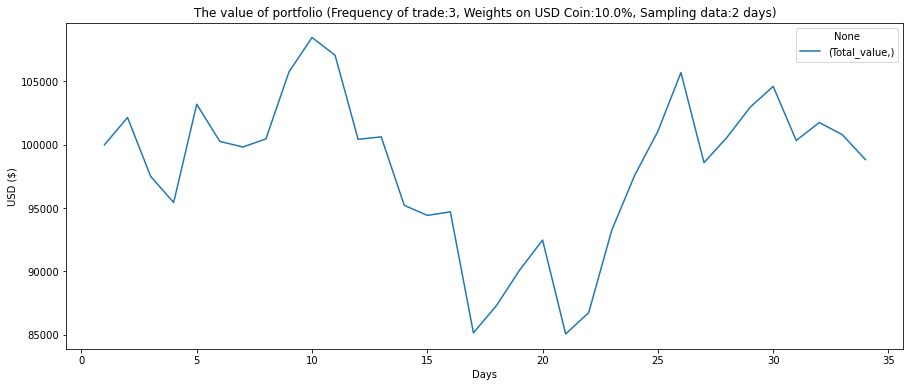

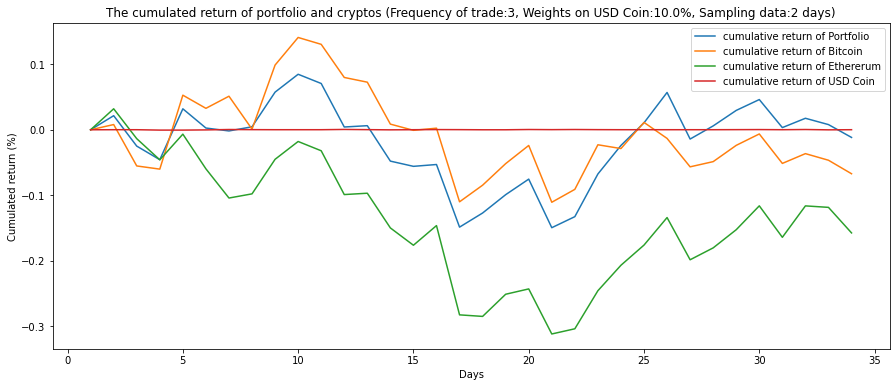

In [117]:
draw_graph(0,settings)